<a href="https://colab.research.google.com/github/FatemehAbediK/EDA/blob/main/data_prep_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
###merging data:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [145]:
table1 = pd.DataFrame({"P_ID" : (1,2,3,4,5,6,7,8),
                     "gender" : ("male", "male", "female","female",
                                "female", "male", "female", "male"),
                     "height" : (71,73,64,64,66,69,62,72),
                     "weight" : (175,225,130,125,165,160,115,250)})

table1

,P_ID,gender,height,weight
0,1,male,71,175
1,2,male,73,225
2,3,female,64,130
3,4,female,64,125
4,5,female,66,165
5,6,male,69,160
6,7,female,62,115
7,8,male,72,250


In [146]:
table2 = pd.DataFrame({"P_ID" : (1, 2, 4, 5, 7, 8, 9, 10),
                     "sex" : ("male", "male", "female","female",
                            "female", "male", "male", "female"),
                     "visits" : (1,2,4,12,2,2,1,1),
                     "checkup" : (1,1,1,1,1,1,0,0),
                     "follow_up" : (0,0,1,2,0,0,0,0),
                     "illness" : (0,0,2,7,1,1,0,0),
                     "surgery" : (0,0,0,2,0,0,0,0),
                     "ER" : ( 0,1,0,0,0,0,1,1) } )

table2

,P_ID,sex,visits,checkup,follow_up,illness,surgery,ER
0,1,male,1,1,0,0,0,0
1,2,male,2,1,0,0,0,1
2,4,female,4,1,1,2,0,0
3,5,female,12,1,2,7,2,0
4,7,female,2,1,0,1,0,0
5,8,male,2,1,0,1,0,0
6,9,male,1,0,0,0,0,1
7,10,female,1,0,0,0,0,1


In [147]:
#A inner joint will delete some data if it's not similar in both groups!

combined1 = pd.merge(table1,       # First table
                    table2,        # Second table
                    how="inner",   # Merge method
                    on="P_ID")     # Column(s) to join on

combined1

,P_ID,gender,height,weight,sex,visits,checkup,follow_up,illness,surgery,ER
0,1,male,71,175,male,1,1,0,0,0,0
1,2,male,73,225,male,2,1,0,0,0,1
2,4,female,64,125,female,4,1,1,2,0,0
3,5,female,66,165,female,12,1,2,7,2,0
4,7,female,62,115,female,2,1,0,1,0,0
5,8,male,72,250,male,2,1,0,1,0,0


In [148]:
# A left join keeps all key values in the first(left) data frame

left_join = pd.merge(table1,       # First table
                    table2,        # Second table
                    how="left",   # Merge method
                    on="P_ID")     # Column(s) to join on

left_join

,P_ID,gender,height,weight,sex,visits,checkup,follow_up,illness,surgery,ER
0,1,male,71,175,male,1.0,1.0,0.0,0.0,0.0,0.0
1,2,male,73,225,male,2.0,1.0,0.0,0.0,0.0,1.0
2,3,female,64,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,female,64,125,female,4.0,1.0,1.0,2.0,0.0,0.0
4,5,female,66,165,female,12.0,1.0,2.0,7.0,2.0,0.0
5,6,male,69,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,female,62,115,female,2.0,1.0,0.0,1.0,0.0,0.0
7,8,male,72,250,male,2.0,1.0,0.0,1.0,0.0,0.0


In [149]:
# A right join keeps all key values in the second(right) data frame

right_join = pd.merge(table1,       # First table
                    table2,        # Second table
                    how="right",   # Merge method
                    on="P_ID")     # Column(s) to join on

right_join

,P_ID,gender,height,weight,sex,visits,checkup,follow_up,illness,surgery,ER
0,1,male,71.0,175.0,male,1,1,0,0,0,0
1,2,male,73.0,225.0,male,2,1,0,0,0,1
2,4,female,64.0,125.0,female,4,1,1,2,0,0
3,5,female,66.0,165.0,female,12,1,2,7,2,0
4,7,female,62.0,115.0,female,2,1,0,1,0,0
5,8,male,72.0,250.0,male,2,1,0,1,0,0
6,9,NaN,NaN,NaN,male,1,0,0,0,0,1
7,10,NaN,NaN,NaN,female,1,0,0,0,0,1


In [150]:
# An outer join keeps all key values in both data frames

outer_join = pd.merge(table1,      # First table
                    table2,        # Second table
                    how="outer",   # Merge method
                    on="P_ID")     # Column(s) to join on

outer_join

,P_ID,gender,height,weight,sex,visits,checkup,follow_up,illness,surgery,ER
0,1,male,71.0,175.0,male,1.0,1.0,0.0,0.0,0.0,0.0
1,2,male,73.0,225.0,male,2.0,1.0,0.0,0.0,0.0,1.0
2,3,female,64.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,female,64.0,125.0,female,4.0,1.0,1.0,2.0,0.0,0.0
4,5,female,66.0,165.0,female,12.0,1.0,2.0,7.0,2.0,0.0
5,6,male,69.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,female,62.0,115.0,female,2.0,1.0,0.0,1.0,0.0,0.0
7,8,male,72.0,250.0,male,2.0,1.0,0.0,1.0,0.0,0.0
8,9,NaN,NaN,NaN,male,1.0,0.0,0.0,0.0,0.0,1.0
9,10,NaN,NaN,NaN,female,1.0,0.0,0.0,0.0,0.0,1.0


In [151]:
table1.rename(columns={"gender":"sex"}, inplace=True) # Rename "gender" column

combined2 = pd.merge(table1,               # First data frame
                  table2,                  # Second data frame
                  how="outer",             # Merge method
                  on=["P_ID","sex"])    # Column(s) to join on

combined2

,P_ID,sex,height,weight,visits,checkup,follow_up,illness,surgery,ER
0,1,male,71.0,175.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2,male,73.0,225.0,2.0,1.0,0.0,0.0,0.0,1.0
2,3,female,64.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,female,64.0,125.0,4.0,1.0,1.0,2.0,0.0,0.0
4,5,female,66.0,165.0,12.0,1.0,2.0,7.0,2.0,0.0
5,6,male,69.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,female,62.0,115.0,2.0,1.0,0.0,1.0,0.0,0.0
7,8,male,72.0,250.0,2.0,1.0,0.0,1.0,0.0,0.0
8,9,male,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0
9,10,female,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0


#now the titanic!!!

dataset

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
titanic=pd.read_excel('/content/drive/MyDrive/dataset files/titanic3.xls')

In [154]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [155]:
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [156]:
titanic.describe()       #only numerics!

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


#categorical to numeric

In [157]:
categorical=titanic.dtypes[titanic.dtypes=="object"].index

print(categorical)


Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'], dtype='object')


In [158]:
titanic[categorical].describe()

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,939,186,3,28,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [159]:
del titanic["name"]

In [160]:
#check to see if others can be helpful in the analysis or not!!

titanic["ticket"][0:15]
titanic["ticket"].describe()


,ticket
count,1309
unique,939
top,CA. 2343
freq,11


In [161]:
del titanic["ticket"]

In [162]:
titanic["cabin"][0:15]

,cabin
0,B5
1,C22 C26
2,C22 C26
3,C22 C26
4,C22 C26
5,E12
6,D7
7,A36
8,C101
9,NaN


In [163]:
titanic["cabin"].describe()

,cabin
count,295
unique,186
top,C23 C25 C27
freq,6


In [164]:
titanic["cabin"].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [165]:
#extract the first letter !

titanic['char_cabin'] = titanic['cabin'].astype(str).str[0]
titanic['char_cabin'] = pd.Categorical(titanic['char_cabin'])

print(titanic[['cabin', 'char_cabin']])



        cabin char_cabin
0          B5          B
1     C22 C26          C
2     C22 C26          C
3     C22 C26          C
4     C22 C26          C
...       ...        ...
1304      NaN          n
1305      NaN          n
1306      NaN          n
1307      NaN          n
1308      NaN          n

[1309 rows x 2 columns]


In [166]:
titanic["cabin"]=titanic['char_cabin']

In [167]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest,char_cabin
0,1,1,female,29.0000,0,0,211.3375,B,S,2,NaN,"St Louis, MO",B
1,1,1,male,0.9167,1,2,151.5500,C,S,11,NaN,"Montreal, PQ / Chesterville, ON",C
2,1,0,female,2.0000,1,2,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C
3,1,0,male,30.0000,1,2,151.5500,C,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C
4,1,0,female,25.0000,1,2,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C


#numeric to categotical

In [168]:
new_survived = pd.Categorical(titanic["survived"], categories=[0, 1], ordered=True)

new_survived = new_survived.rename_categories(['died', 'survived'])

print(new_survived.describe())



            counts     freqs
categories                  
died           809  0.618029
survived       500  0.381971


In [169]:
new_pclass=pd.Categorical(titanic["pclass"] ,categories=[0, 1 , 2], ordered=True)

new_pclass=new_pclass.rename_categories(["class1" , "class2" , "class3"])

new_pclass.describe()

,counts,freqs
categories,,
class1,0,0.000000
class2,323,0.246753
class3,277,0.211612
NaN,709,0.541635


In [170]:
titanic["survived"] = new_survived
titanic["pclass"] = new_pclass

titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest,char_cabin
0,class2,survived,female,29.0000,0,0,211.3375,B,S,2,NaN,"St Louis, MO",B
1,class2,survived,male,0.9167,1,2,151.5500,C,S,11,NaN,"Montreal, PQ / Chesterville, ON",C
2,class2,died,female,2.0000,1,2,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C
3,class2,died,male,30.0000,1,2,151.5500,C,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C
4,class2,died,female,25.0000,1,2,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C


#missing----isnull!

In [171]:
titanic["age"].describe()

,age
count,1046.000000
mean,29.881135
std,14.413500
min,0.166700
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


(array([  15,   37,   40,   46,   59,   69,   70,   74,   80,  106,  107,
        108,  118,  121,  125,  134,  147,  152,  157,  166,  176,  179,
        184,  196,  204,  219,  223,  235,  237,  241,  254,  256,  269,
        277,  283,  293,  297,  318,  320,  363,  382,  384,  410,  469,
        473,  477,  483,  491,  495,  524,  528,  531,  581,  595,  597,
        672,  680,  681,  682,  705,  706,  756,  757,  767,  768,  775,
        789,  795,  798,  800,  801,  802,  804,  805,  808,  812,  813,
        815,  816,  819,  835,  842,  843,  852,  854,  856,  858,  865,
        871,  872,  874,  876,  879,  882,  886,  887,  900,  901,  902,
        903,  918,  920,  921,  922,  923,  926,  927,  928,  929,  930,
        931,  940,  942,  944,  945,  946,  948,  954,  955,  956,  957,
        958,  961,  962,  971,  973,  976,  982,  983,  984,  987,  988,
        989,  991,  993,  994,  997,  998,  999, 1000, 1001, 1002, 1003,
       1004, 1005, 1006, 1009, 1012, 1013, 1014, 1

array([[<Axes: title={'center': 'age'}>]], dtype=object)

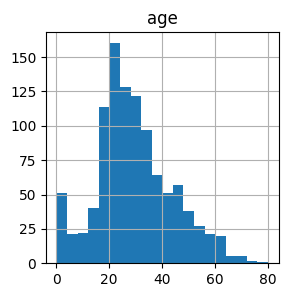

In [172]:
missing=np.where(titanic["age"].isnull()==True)         #giving us an array of the indexes of isnull data
print(missing)

print(len(missing[0]))


#fill with 0 /mean or median---------check for the distribution
titanic.hist("age",figsize=(3,3),bins=20)


In [173]:
#with median of 28

new_age_var=np.where(titanic["age"].isnull()==True ,      #check
                     28 ,                                       #if check is true -----replace median of 28
                     titanic["age"])                      #if check is false ---- remain the value of Age

titanic["age"]=new_age_var

In [174]:
titanic["age"].describe()

,age
count,1309.000000
mean,29.503183
std,12.905246
min,0.166700
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


array([[<Axes: title={'center': 'age'}>]], dtype=object)

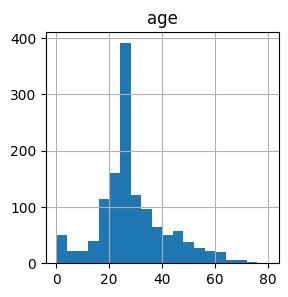

In [175]:
titanic.hist("age",figsize=(3,3),bins=20)

In [176]:
titanic["fare"].describe()

,fare
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


In [177]:
titanic["fare"].isnull().sum()

1

In [178]:
from types import NoneType
#you can also fill the missings with imputer!(mean,median,mode)

#first assume we make some missing values!!
titanic["fare"]=np.where(titanic["fare"]>130 , 0 , titanic["fare"])
titanic["fare"]

,fare
0,0.0000
1,0.0000
2,0.0000
3,0.0000
4,0.0000
...,...
1304,14.4542
1305,14.4542
1306,7.2250
1307,7.2250


In [179]:
from sklearn.impute import SimpleImputer

#now use the imputer!!
imp=SimpleImputer(strategy="mean" )
imputed_fare=imp.fit_transform(titanic[['fare']])

In [180]:
titanic['fare'] = imputed_fare
titanic.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest,char_cabin
0,class2,survived,female,29.0000,0,0,0.0000,B,S,2,NaN,"St Louis, MO",B
1,class2,survived,male,0.9167,1,2,0.0000,C,S,11,NaN,"Montreal, PQ / Chesterville, ON",C
2,class2,died,female,2.0000,1,2,0.0000,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C
3,class2,died,male,30.0000,1,2,0.0000,C,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C
4,class2,died,female,25.0000,1,2,0.0000,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C
5,class2,survived,male,48.0000,0,0,26.5500,E,S,3,NaN,"New York, NY",E
6,class2,survived,female,63.0000,1,0,77.9583,D,S,10,NaN,"Hudson, NY",D
7,class2,died,male,39.0000,0,0,0.0000,A,S,NaN,NaN,"Belfast, NI",A
8,class2,survived,female,53.0000,2,0,51.4792,C,S,D,NaN,"Bayside, Queens, NY",C
9,class2,died,male,71.0000,0,0,49.5042,n,C,NaN,22.0,"Montevideo, Uruguay",n


#feature engeenering---new variables

In [181]:
titanic_train["Family"]=titanic_train["sibsp"]+titanic_train["parch"]
titanic_train["Family"].describe()

,Family
count,1309.000000
mean,0.883881
std,1.583639
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,10.000000


In [182]:
most_family=np.where(titanic_train["Family"] == max(titanic_train["Family"]))
titanic_train.loc[most_family]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Family
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN,67.0,NaN,10
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,10


###pd.crosstab(index , columns)-----chi square for numerics!!! **

In [183]:
my_tab = pd.crosstab(index=titanic["survived"],  # Make a crosstab
                     columns="count")            # Name the count column

my_tab

col_0,count
survived,
died,809
survived,500


In [184]:
pd.crosstab(index=titanic_train["pclass"],  # Make a crosstab
            columns="count")                # Name the count column

col_0,count
pclass,
1,323
2,277
3,709


In [185]:
pd.crosstab(index=titanic_train["sex"],     # Make a crosstab
                      columns="count")      # Name the count column

col_0,count
sex,
female,466
male,843


In [186]:
titanic.sex.value_counts()

,count
sex,
male,843
female,466


In [187]:
cabin_tab = pd.crosstab(index=titanic_train["cabin"],  # Make a crosstab
                        columns="count")               # Name the count column

cabin_tab

col_0,count
cabin,
A10,1
A11,1
A14,1
A16,1
A18,1
...,...
F33,4
F38,1
F4,4


In [188]:
print (cabin_tab.sum(), "\n")   # Sum the counts

print (cabin_tab.shape, "\n")   # Check number of rows and cols

cabin_tab.iloc[1:7]             # Slice rows 1-6

col_0
count    295
dtype: int64 

(186, 1) 



col_0,count
cabin,
A11,1
A14,1
A16,1
A18,1
A19,1
A20,1


In [189]:
cabin_tab/cabin_tab.sum()     #gives us the means of each column(proportions)

col_0,count
cabin,
A10,0.003390
A11,0.003390
A14,0.003390
A16,0.003390
A18,0.003390
...,...
F33,0.013559
F38,0.003390
F4,0.013559


###two-way tables:chi-square

In [190]:
# Table of survival vs. sex
survived_sex = pd.crosstab(index=titanic_train["survived"],
                           columns=titanic_train["sex"])

survived_sex.index= ["died","survived"]

survived_sex

sex,female,male
died,127,682
survived,339,161


In [191]:
# Table of survival vs passenger class
survived_class = pd.crosstab(index=titanic_train["survived"],
                            columns=titanic_train["pclass"])

survived_class.columns = ["class1","class2","class3"]
survived_class.index= ["died","survived"]

survived_class

,class1,class2,class3
died,123,158,528
survived,200,119,181


In [192]:
# Table of survival vs passenger class
survived_class = pd.crosstab(index=titanic_train["survived"],
                            columns=titanic_train["pclass"],
                             margins=True)      # Include row and column totals

survived_class.columns = ["class1","class2","class3","rowtotal"]
survived_class.index= ["died","survived","coltotal"]

survived_class

,class1,class2,class3,rowtotal
died,123,158,528,809
survived,200,119,181,500
coltotal,323,277,709,1309


In [193]:
survived_class/survived_class.loc["coltotal","rowtotal"]   #gives us the means of each column(proportions)

,class1,class2,class3,rowtotal
died,0.093965,0.120703,0.403361,0.618029
survived,0.152788,0.090909,0.138273,0.381971
coltotal,0.246753,0.211612,0.541635,1.000000


In [194]:
survived_class/survived_class.loc["coltotal"]            #based on total columns

,class1,class2,class3,rowtotal
died,0.380805,0.570397,0.744711,0.618029
survived,0.619195,0.429603,0.255289,0.381971
coltotal,1.000000,1.000000,1.000000,1.000000


In [195]:
#2 ways
survived_class.div(survived_class["rowtotal"],axis=0)   #based on total rows

survived_class.T/survived_class["rowtotal"]

,died,survived,coltotal
class1,0.152040,0.400,0.246753
class2,0.195303,0.238,0.211612
class3,0.652658,0.362,0.541635
rowtotal,1.000000,1.000,1.000000


In [196]:
##multi dimensional table(3 variables!)

surv_sex_class = pd.crosstab(index=titanic_train["survived"],
                             columns=[titanic_train["pclass"],
                                      titanic_train["sex"]],
                             margins=True)   # Include row and column totals

surv_sex_class

pclass        1           2           3        All
sex      female male female male female male      
survived                                          
0             5  118     12  146    110  418   809
1           139   61     94   25    106   75   500
All         144  179    106  171    216  493  1309

In [197]:
surv_sex_class[2]

sex,female,male
survived,,
0,12,146
1,94,25
All,106,171


In [198]:
surv_sex_class[2]["female"]

,female
survived,
0,12
1,94
All,106


In [199]:
surv_sex_class/surv_sex_class.loc["All"]    # Divide by column totals(proportions)

pclass           1                   2                   3                All
sex         female      male    female      male    female     male          
survived                                                                     
0         0.034722  0.659218  0.113208  0.853801  0.509259  0.84787  0.618029
1         0.965278  0.340782  0.886792  0.146199  0.490741  0.15213  0.381971
All       1.000000  1.000000  1.000000  1.000000  1.000000  1.00000  1.000000